# 隕石落點資料視覺化
## 使用 matplotlib
- AIC X PyLadies Python Data Visualization 系列
- 講師: Ichi Tsai, tsaiichi.1@gmail.com

# Scatter plot from tutorial
- https://matplotlib.org/gallery/shapes_and_collections/scatter.html#sphx-glr-gallery-shapes-and-collections-scatter-py
- color map: https://matplotlib.org/users/colormaps.html

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


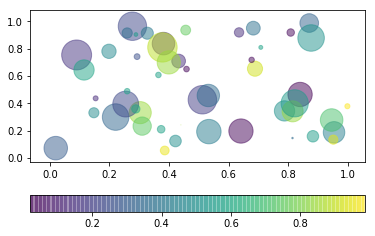

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2

fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

mappable = ax.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='viridis')
fig.colorbar(mappable, ax=ax, orientation='horizontal')

# axes, sharex, sharey, figure size

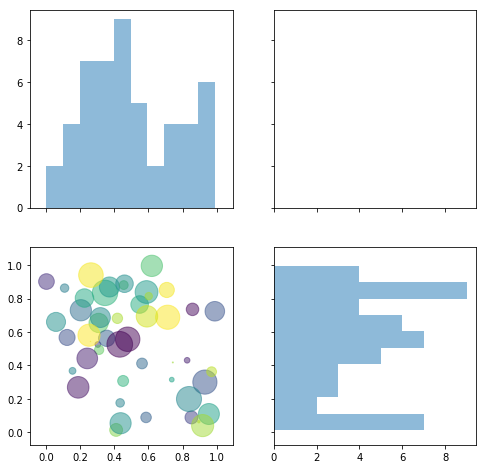

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

fig, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(8,8))
axarr[0, 0].hist(x, alpha=0.5)

axarr[1, 1].hist(y, alpha=0.5, orientation='horizontal')

mappable = axarr[1, 0].scatter(x, y, s=area, c=colors, alpha=0.5, cmap='viridis')

# subplot2gird

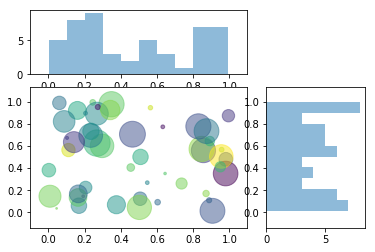

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

ax_x_hist = plt.subplot2grid((3, 3), (0,0), colspan=2)
ax_scatter = plt.subplot2grid((3, 3), (1,0), rowspan=2, colspan=2, sharex=ax_x_hist)
ax_y_hist = plt.subplot2grid((3, 3), (1,2), rowspan=2, sharey=ax_scatter)


ax_x_hist.hist(x, alpha=0.5)
ax_y_hist.hist(y, alpha=0.5, orientation='horizontal')
ax_scatter.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='viridis')

# plt.figure, set_visible

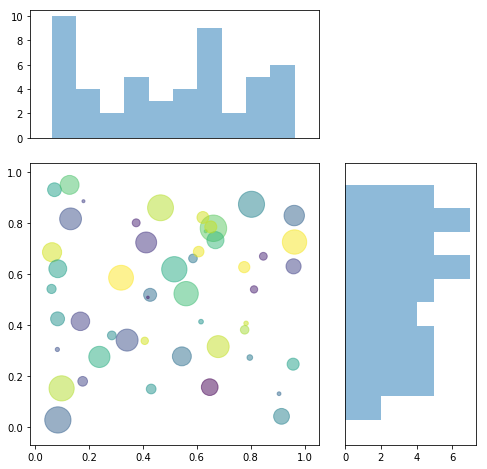

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)

colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2

plt.figure(figsize=(8, 8))

ax_x_hist = plt.subplot2grid((3, 3), (0,0), colspan=2)
ax_scatter = plt.subplot2grid((3, 3), (1,0), rowspan=2, colspan=2, sharex=ax_x_hist)
ax_y_hist = plt.subplot2grid((3, 3), (1,2), rowspan=2, sharey=ax_scatter)

ax_x_hist.get_xaxis().set_visible(False)
ax_y_hist.get_yaxis().set_visible(False)

ax_x_hist.hist(x, alpha=0.5)
ax_y_hist.hist(y, alpha=0.5, orientation='horizontal')
ax_scatter.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='viridis')

# Get Dataset

In [10]:
!ls

meteorite-landings.csv	隕石落點視覺化-matplotlib.ipynb
README.md		隕石落點視覺化-seaborn.ipynb


In [7]:
import pandas as pd
data_path = "./meteorite-landings.csv"
df = pd.read_csv(data_path)
display(
    df.head(),
    df.shape
)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


(45716, 10)

178.2 -165.43333
81.16667 -87.36667
[0 0 0 ... 1 1 1] Index(['Fell', 'Found'], dtype='object')


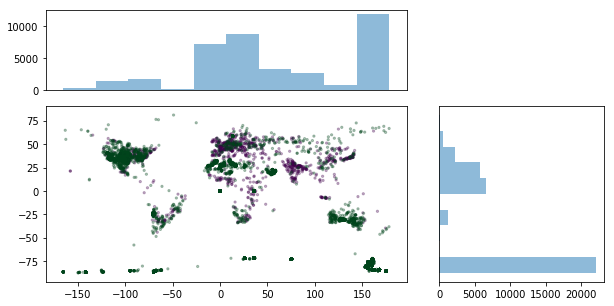

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

df = df[df['reclong']<=180]

x = df['reclong']
print(max(x), min(x))

y = df['reclat']
print(max(y), min(y))

# encode 'fall' to colors
colors, levels = pd.factorize(df['fall'])
print(colors, levels)

plt.figure(figsize=(10, 5))

ax_x_hist = plt.subplot2grid((3, 3), (0,0), colspan=2)
ax_scatter = plt.subplot2grid((3, 3), (1,0), rowspan=2, colspan=2, sharex=ax_x_hist)
ax_y_hist = plt.subplot2grid((3, 3), (1,2), rowspan=2, sharey=ax_scatter)

ax_x_hist.get_xaxis().set_visible(False)
ax_y_hist.get_yaxis().set_visible(False)

ax_x_hist.hist(x.dropna(), alpha=0.5)
ax_y_hist.hist(y.dropna(), alpha=0.5, orientation='horizontal')
ax_scatter.scatter(x, y, s=5, c=colors, alpha=0.3, cmap=plt.cm.PRGn)

178.2 -165.43333
81.16667 -87.36667
60000000.0 0.0
1.0 0.0
[0 0 0 ... 1 1 1] Index(['Fell', 'Found'], dtype='object')


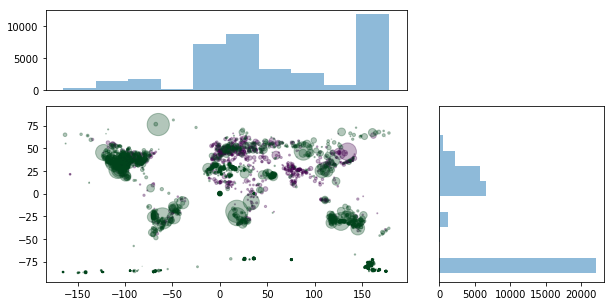

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#df = df[df['reclong']<=180]

x = df['reclong']
print(max(x), min(x))

y = df['reclat']
print(max(y), min(y))

mass = df['mass']
print(max(mass), min(mass))
areas = (mass-min(mass)) / (max(mass)-min(mass))
print(max(areas), min(areas))

# encode 'fall' to colors
colors, levels = pd.factorize(df['fall'])
print(colors, levels)

plt.figure(figsize=(10, 5))

ax_x_hist = plt.subplot2grid((3, 3), (0,0), colspan=2)
ax_scatter = plt.subplot2grid((3, 3), (1,0), rowspan=2, colspan=2, sharex=ax_x_hist)
ax_y_hist = plt.subplot2grid((3, 3), (1,2), rowspan=2, sharey=ax_scatter)

ax_x_hist.get_xaxis().set_visible(False)
ax_y_hist.get_yaxis().set_visible(False)

ax_x_hist.hist(x.dropna(), alpha=0.5)
ax_y_hist.hist(y.dropna(), alpha=0.5, orientation='horizontal')
mappable=ax_scatter.scatter(x, y, s=np.sqrt(areas)*500, c=colors, alpha=0.3, cmap=plt.cm.PRGn)